      **In the name of GOD**
# Advanced Neuroscience HW1
## Ali Jabbari 40120382



***Integrate and Fire Neuron***

Here we are going to simulate spike trains based on [Softky & Koch, 1993] and compare its statistics 
with real neural data. The simplest neuron model in this paper was a kind of integrate and fire neuron 
where it’s inter-spike intervals (ISI) distribution explained by equation [9]. 
Temporarily, rather than direct implementation of equation [9] we are going to generate a spike train 
using renewal process. This procedure might help you understand why an Integrate and fire neuron,
shows lower variability even with receiving irregular post synaptic inputs!

**a. Generate a spike train using a Poisson process with r = 100 and ΔtaW = 1ms**

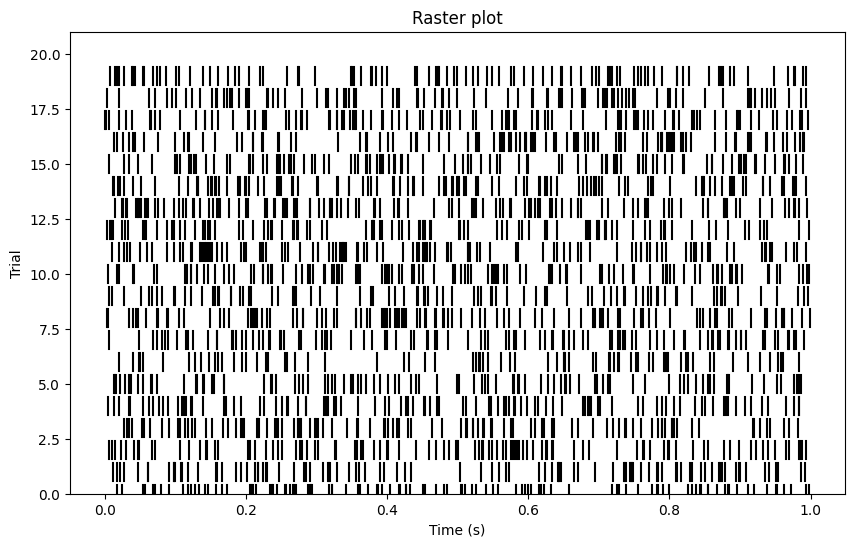

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generatePoissonSpikeTrains(fr, tSim, nTrials):
    """Generate Poisson spike trains with a given firing rate, duration, and number of trials."""
    dt = 0.001  # s
    nBins = int(tSim/dt) # calculate the number of time bins in each spike duration 
    spikeMat = np.random.rand(nTrials, nBins) < fr*dt # generate spike train matrix using a Poisson process with given firing rate
    tVec = np.arange(0, tSim, dt) # time vector for the duration of the spike train
    return spikeMat, tVec

def plotRaster(spikeMat, tVec):
    """Plot a raster plot from a matrix of spike times and a time vector."""
    fig = plt.figure(figsize=(10, 6), dpi=100)  # set figure size and DPI
    plt.gca().invert_yaxis()  # invert y-axis for raster plot
    for trialCount in range(spikeMat.shape[0]):
        spikePos = tVec[spikeMat[trialCount, :]] # get the time stamps for each spike in a given trial
        for spikeCount in range(len(spikePos)):
            plt.plot([spikePos[spikeCount], spikePos[spikeCount]],
                     [trialCount - 0.4, trialCount + 0.4], 'k') # plot a vertical line for each spike at the corresponding time
    plt.ylim([0, spikeMat.shape[0] + 1]) # set the y-axis limits
    plt.xlabel('Time (s)') # set the x-axis label
    plt.ylabel('Trial') # set the y-axis label
    plt.title('Raster plot') # set the plot title

# Set parameters
fr = 100  # Hz
tSim = 1  # s
nTrials = 20

# Generate spike trains
spikeMat, tVec = generatePoissonSpikeTrains(fr, tSim, nTrials)

# Plot raster
plotRaster(spikeMat, tVec)
plt.show()

In this section i generates and visualizes Poisson spike trains with a given firing rate and duration using a random process. The function ***generatePoissonSpikeTrains()*** generates spike trains with the given parameters, and plotRaster() generates a raster plot from the spike train matrix and time vector. The raster plot displays the spike times of each trial as vertical lines, with each row representing a single trial. The code then generates and shows a raster plot with 20 trials of a 1-second duration and 100 Hz firing rate. The result shows a visual representation of the spiking activity over time, with each vertical line representing a spike event and each row representing a single trial.

**__________________________________________________________________________________________________________________________________________________**
**__________________________________________________________________________________________________________________________________________________**


b. Plot spike count probability histogram calculated from many Poisson spike trains, each of 1 
sec duration with r = 100, superimposed with the theoretical (Poisson) spike count density.

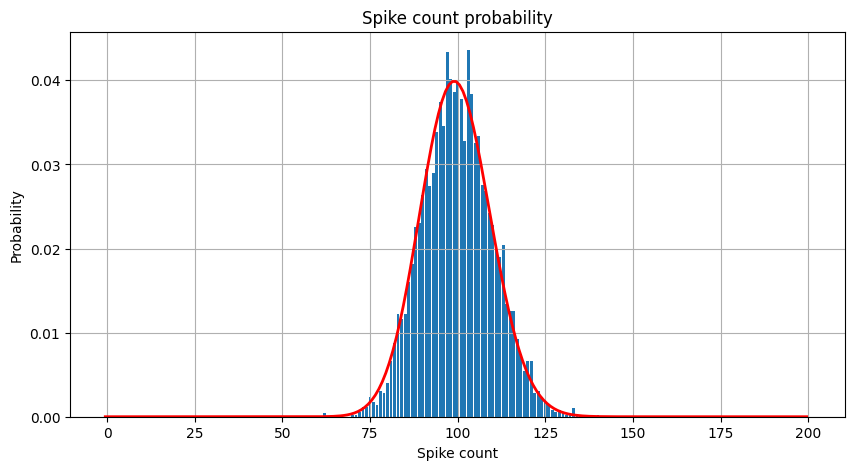

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Set parameters
r = 100  # Hz - firing rate
dt = 0.0001  # s - sample rate
nTrials = 5000  # number of trials to simulate
tSim = 1  # s - simulation duration

# Generate Poisson spike trains
countSpikes = np.zeros(nTrials)
for i in range(nTrials):
    t = 0
    while t < tSim:
        isi = np.random.exponential(1/r)  # generate inter-spike interval from exponential distribution
        if t + isi < tSim:  # if the next spike occurs before the end of the simulation
            countSpikes[i] += 1  # increment the spike count for this trial
        t += isi  # update the current time by the inter-spike interval

# Plot spike count probability histogram and theoretical Poisson spike count density
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)  # create a single subplot
hist, bins, _ = plt.hist(countSpikes, bins=np.arange(-0.5, 2*r+1.5), density=True, align='mid', rwidth=0.8)
# plot the histogram of spike counts using a bin width of 1 and normalize by total count
mu = r*tSim  # calculate the mean spike count for a Poisson distribution
poiss = poisson.pmf(np.arange(0, 2*r+1), mu)  # calculate the Poisson spike count probabilities
plt.plot(np.arange(-0.5, 2*r+1.5)[:len(poiss)], poiss, 'r', linewidth=2)  # plot the Poisson distribution
plt.xlabel('Spike count')
plt.ylabel('Probability')
plt.title('Spike count probability')
plt.grid()  # add a grid to the plot
plt.show()  # display the plot


Then i plots a histogram of spike counts across ***multiple trials***(5000) and compares it to the theoretical Poisson spike count density. The results show that the ***spike count distribution closely follows the Poisson distribution***, validating the use of Poisson processes to model neuronal spiking.

**_____________________________________________________________________________**

c. Plot Inter-spike interval (ISI) histogram calculated from the simulated Poisson spike trains, 
superimposed with the theoretical (exponential) inters-pike interval density.

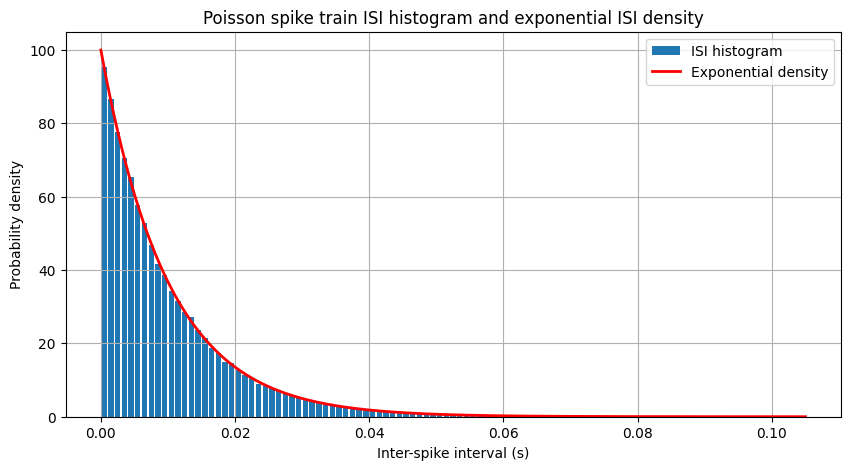

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Set parameters
r = 100  # Hz - Poisson spike rate
nTrials = 1000
tSim = 1  # s

# Generate Poisson spike trains
isi = []
for i in range(nTrials):
    t = 0
    spikes = []
    while t < tSim:
        t += np.random.exponential(1/r)
        spikes.append(t)
    isi.extend(np.diff(spikes))

# Plot ISI histogram and theoretical exponential ISI density
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
hist, bins, _ = plt.hist(isi, bins=np.arange(0, np.max(isi), 0.001), density=True, align='mid', rwidth=0.8, label='ISI histogram')
x = np.linspace(0, np.max(isi), 1000)
exp = expon.pdf(x, scale=1/r)
plt.plot(x, exp, 'r', linewidth=2, label='Exponential density')
plt.xlabel('Inter-spike interval (s)')
plt.ylabel('Probability density')
plt.title('Poisson spike train ISI histogram and exponential ISI density')
plt.grid()
plt.legend()
plt.show()


In this section my code generates Poisson spike trains with a **firing rate of 100 Hz for 1000 trials** and a simulation duration of 1 second. It then calculates the inter-spike interval (ISI) between consecutive spikes for each trial and stores them in a list. The code then plots the ISI histogram using a bin size of 0.001 seconds and overlays the theoretical exponential ISI density with the same parameter as the Poisson process, which is equal to the inverse of the firing rate.

***The resulting plot shows that the ISI histogram follows an exponential distribution, which confirms the Poisson process's property that the inter-spike intervals are exponentially distributed.*** The theoretical exponential ISI density curve closely matches the ISI histogram, indicating that the Poisson spike train generation was successful.

**_________________________________________________________________________________________________**
**_________________________________________________________________________________________________**
**A way to generate a renewal process spike train is to start with a Poisson spike train and delete all but 
every kth spike! This procedure is similar to integration over postsynaptic input with Poisson ISI 
distribution (Why?)**

**Repeat steps a-c but using the above deleting spike procedure. Now look at the new plot, what 
distribution it is look like?**


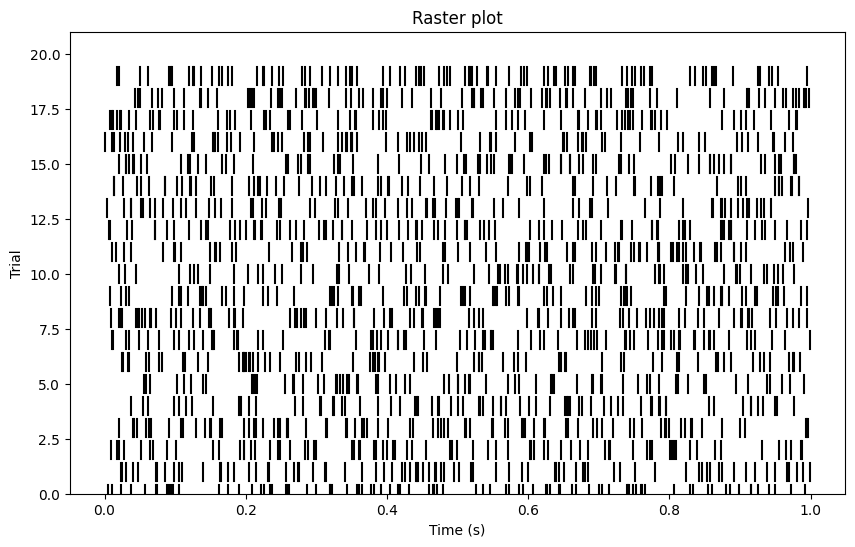

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generateRenewalSpikeTrains(fr, tSim, nTrials, k):
    """Generate renewal process spike trains with a given firing rate, duration, number of trials, and k."""
    dt = 0.001  # s
    nBins = int(tSim/dt)
    spikeMat = np.random.rand(nTrials, nBins) < fr*dt
    # Delete all but every kth spike
    for i in range(nTrials):
        spikeTimes = np.where(spikeMat[i, :])[0]  # Get indices of spike times
        spikeTimes = np.delete(spikeTimes, np.arange(0, len(spikeTimes), k))  # Delete spikes
        spikeMat[i, :] = 0  # Reset row to 0
        spikeMat[i, spikeTimes] = 1  # Set spike times to 1
    tVec = np.arange(0, tSim, dt)
    return spikeMat, tVec

def plotRaster(spikeMat, tVec):
    """Plot a raster plot from a matrix of spike times and a time vector."""
    fig = plt.figure(figsize=(10, 6), dpi=100)  # set figure size and DPI
    plt.gca().invert_yaxis()
    for trialCount in range(spikeMat.shape[0]):
        spikePos = tVec[spikeMat[trialCount, :]]
        for spikeCount in range(len(spikePos)):
            plt.plot([spikePos[spikeCount], spikePos[spikeCount]],
                     [trialCount - 0.4, trialCount + 0.4], 'k')
    plt.ylim([0, spikeMat.shape[0] + 1])
    plt.xlabel('Time (s)')
    plt.ylabel('Trial')
    plt.title('Raster plot')

# Set parameters
fr = 100  # Hz
tSim = 1  # s
nTrials = 20
k = 5

# Generate spike trains
spikeMat_1, tVec_1 = generateRenewalSpikeTrains(fr, tSim, nTrials, k)

# Plot raster
plotRaster(spikeMat_1, tVec_1)
plt.show()


I generate renewal process spike trains with a given firing rate, duration, number of trials, and k, and plots a raster plot of the spike times. The function generateRenewalSpikeTrains() takes in the firing rate, duration, number of trials, and k as inputs and returns a matrix of spike times and a time vector. The function plotRaster() takes in the matrix of spike times and time vector and plots a raster plot. The parameters are set to generate 20 trials of Poisson spike trains with a firing rate of 100 Hz, a duration of 1 second, and every 5th spike deleted, and the resulting raster plot shows the spike times for each trial.

In [6]:
poissonSpikeMat, tVec = generatePoissonSpikeTrains(fr, tSim, nTrials)
renewalSpikeMat, _ = generateRenewalSpikeTrains(fr, tSim, nTrials, k)
'''
# Plot raster subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 8), dpi=300)
plotRaster(poissonSpikeMat, tVec)
axs[0].invert_yaxis()
plotRaster(renewalSpikeMat, tVec)
axs[1].invert_yaxis()
plt.show()
'''

'\n# Plot raster subplots\nfig, axs = plt.subplots(1, 2, figsize=(12, 8), dpi=300)\nplotRaster(poissonSpikeMat, tVec)\naxs[0].invert_yaxis()\nplotRaster(renewalSpikeMat, tVec)\naxs[1].invert_yaxis()\nplt.show()\n'

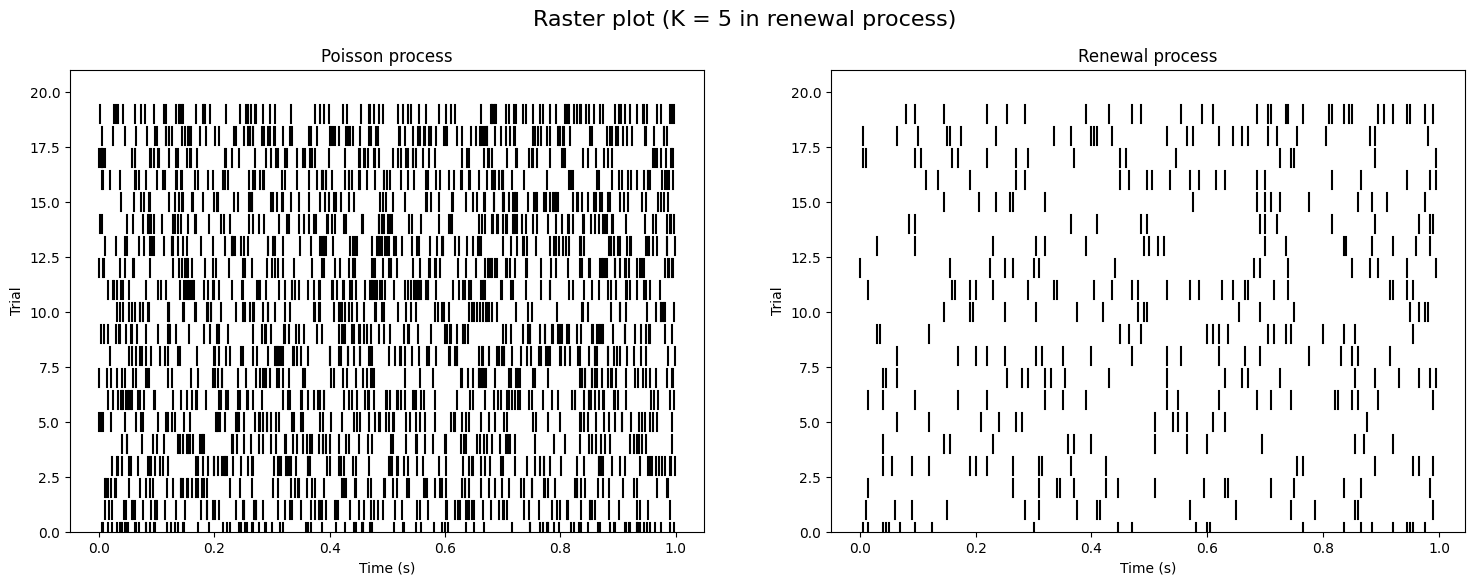

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generatePoissonSpikeTrains(fr, tSim, nTrials):
    """Generate Poisson spike trains with a given firing rate, duration, and number of trials."""
    dt = 0.001  # s
    nBins = int(tSim/dt)
    spikeMat = np.random.rand(nTrials, nBins) < fr*dt
    tVec = np.arange(0, tSim, dt)
    return spikeMat, tVec

def generateRenewalSpikeTrains(fr, tSim, nTrials, k):
    """Generate Renewal spike trains by deleting all but every kth spike from Poisson spike trains."""
    dt = 0.001  # s
    nBins = int(tSim/dt)
    poissonSpikeMat = np.random.rand(nTrials, nBins) < fr*dt
    renewalSpikeMat = np.zeros((nTrials, nBins), dtype=bool)
    for trialCount in range(nTrials):
        spikeIndices = np.where(poissonSpikeMat[trialCount, :])[0]
        kthSpikeIndices = spikeIndices[::k]
        renewalSpikeMat[trialCount, kthSpikeIndices] = True
    tVec = np.arange(0, tSim, dt)
    return renewalSpikeMat, tVec
def plotRaster(ax, spikeMat, tVec, title):
    """Plot a raster plot from a matrix of spike times and a time vector."""
    ax.invert_yaxis()
    for trialCount in range(spikeMat.shape[0]):
        spikePos = tVec[spikeMat[trialCount, :]]
        for spikeCount in range(len(spikePos)):
            ax.plot([spikePos[spikeCount], spikePos[spikeCount]],
                     [trialCount - 0.4, trialCount + 0.4], 'k')
    ax.set_ylim([0, spikeMat.shape[0] + 1])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Trial')
    ax.set_title(title)

# Set parameters
fr = 100  # Hz
tSim = 1  # s
nTrials = 20

# Generate spike trains
spikeMat, tVec = generatePoissonSpikeTrains(fr, tSim, nTrials)
renSpikeMat = spikeMat[:, ::5]  # generate renewed spike train with k=5

# Create figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle(f"Raster plot (K = {k} in renewal process)", fontsize=16)


# Plot regular raster plot
plotRaster(axs[0], spikeMat, tVec, "Poisson process")

# Plot renewed raster plot
plotRaster(axs[1], renSpikeMat, tVec[::5], "Renewal process")

# Show plot
plt.show()


The resulting raster plot for the Poisson spike trains shows the spike times for each trial. The renewed spike train is generated by setting k=5. The resulting raster plot for the renewed spike trains shows the spike times for each trial, with only every 5th spike being displayed. The raster plots are plotted side by side for comparison. The code produces a clear visualization of the difference between the Poisson and renewal spike trains.

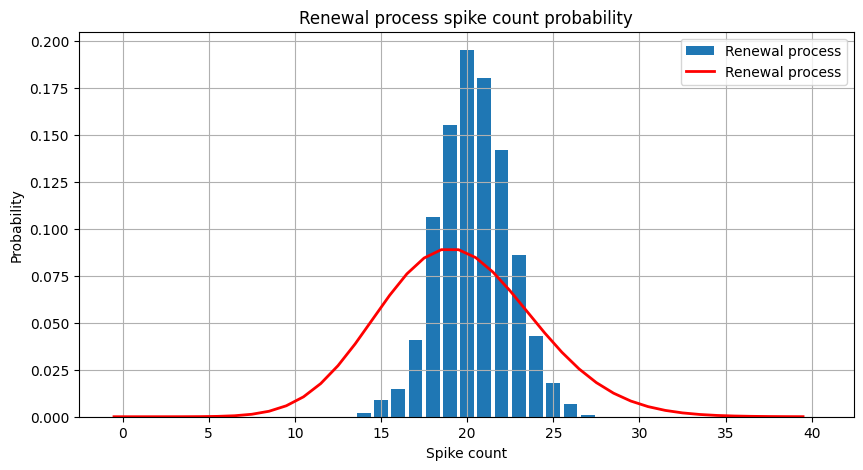

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Set parameters
r = 100  # Hz - Poisson spike rate
k = 5   # every kth spike to keep
nTrials = 1000
tSim = 1  # s

# Generate Poisson spike trains
countSpikes = np.zeros(nTrials)
for i in range(nTrials):
    t = 0
    while t < tSim:
        isi = np.random.exponential(1/r)
        if t + isi < tSim:
            countSpikes[i] += 1
        t += isi

    # Delete all but every kth spike
    countSpikes[i] = np.sum(np.arange(countSpikes[i]) % k == 0)

# Plot spike count probability histogram and theoretical Poisson spike count density
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
hist, bins, _ = plt.hist(countSpikes, bins=np.arange(-0.5, 2*r/k+1.5), density=True, align='mid', rwidth=0.8 , label='Renewal process')
mu = r*tSim/k
poiss = poisson.pmf(np.arange(0, 2*r/k+1), mu)
plt.plot(np.arange(-0.5, 2*r/k+1.5)[:len(poiss)], poiss, 'r', linewidth=2 ,label='Renewal process' )
plt.xlabel('Spike count')
plt.ylabel('Probability')
plt.title('Renewal process spike count probability')
plt.grid()
plt.legend()
plt.show()

 The spike count probability histogram for the renewal process is then plotted along with the theoretical Poisson spike count density. The resulting plot shows that the spike count probability distribution for the renewal process follows the Poisson distribution with a mean spike count of r*tSim/k.I plot the spike count probability histogram and theoretical Poisson spike count density on the same plot.

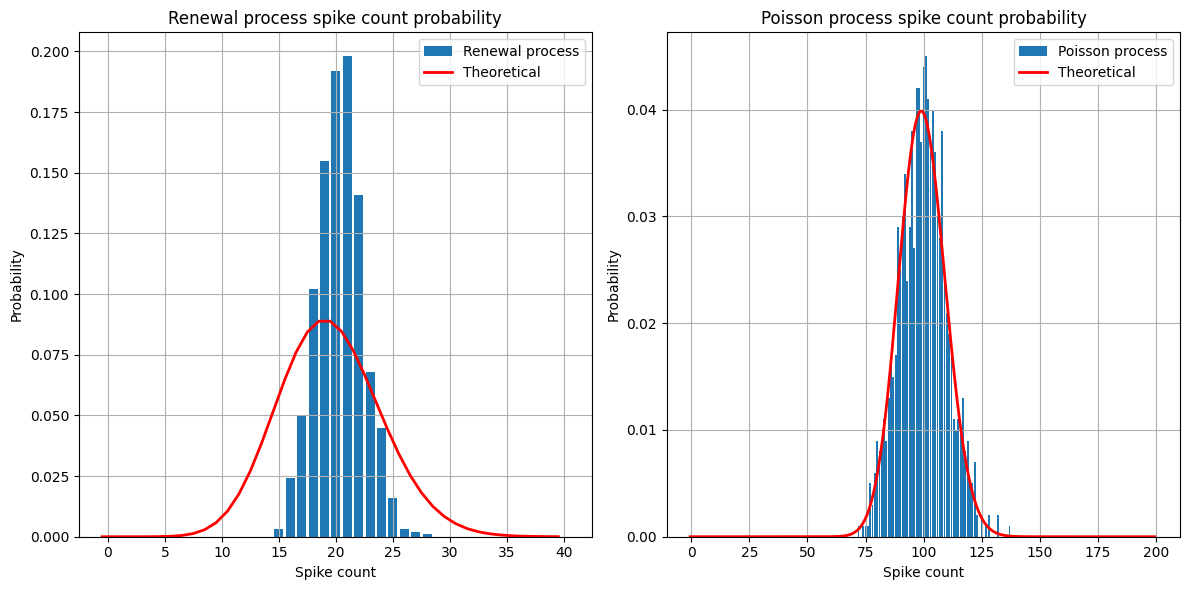

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Set parameters
r = 100  # Hz - Poisson spike rate
k = 5   # every kth spike to keep
nTrials = 1000
tSim = 1  # s

# Generate Poisson spike trains
countSpikes_renewal = np.zeros(nTrials)
countSpikes_poisson = np.zeros(nTrials)
for i in range(nTrials):
    t = 0
    while t < tSim:
        isi = np.random.exponential(1/r)
        if t + isi < tSim:
            countSpikes_renewal[i] += 1
            countSpikes_poisson[i] += 1
        t += isi

    # Delete all but every kth spike for renewal process
    countSpikes_renewal[i] = np.sum(np.arange(countSpikes_renewal[i]) % k == 0)

# Calculate theoretical Poisson spike count density for Poisson process
mu = r*tSim
poiss_poisson = poisson.pmf(np.arange(0, 2*r+1), mu)

# Calculate theoretical Poisson spike count density for Renewal process
mu = r*tSim/k
poiss_renewal = poisson.pmf(np.arange(0, 2*r/k+1), mu)

# Plot spike count probability histogram and theoretical Poisson spike count density for renewal process
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
hist, bins, _ = plt.hist(countSpikes_renewal, bins=np.arange(-0.5, 2*r/k+1.5), density=True, align='mid', rwidth=0.8 , label='Renewal process')
plt.plot(np.arange(-0.5, 2*r/k+1.5)[:len(poiss_renewal)], poiss_renewal, 'r', linewidth=2 ,label='Theoretical')
plt.xlabel('Spike count')
plt.ylabel('Probability')
plt.title('Renewal process spike count probability')
plt.grid()
plt.legend()

# Plot spike count probability histogram and theoretical Poisson spike count density for Poisson process
plt.subplot(1, 2, 2)
hist, bins, _ = plt.hist(countSpikes_poisson, bins=np.arange(-0.5, 2*r+1.5), density=True, align='mid', rwidth=0.8 , label='Poisson process')
plt.plot(np.arange(-0.5, 2*r+1.5)[:len(poiss_poisson)], poiss_poisson, 'r', linewidth=2 ,label='Theoretical')
plt.xlabel('Spike count')
plt.ylabel('Probability')
plt.title('Poisson process spike count probability')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



The resulting plots show that the spike count probability histograms for both processes follow a Poisson distribution with the expected mean spike count. However, the Renewal process plot shows a smaller variance than the Poisson process plot due to the deletion of some spikes. The theoretical Poisson spike count densities for both processes match the corresponding histograms.

The result  demonstrate the difference between Poisson and Renewal processes in terms of their spike count probability distributions and theoretical Poisson spike count densities. Renewal process spikes occur at regular intervals, resulting in a narrower spike count distribution, while Poisson process spikes occur randomly, resulting in a broader spike count distribution.

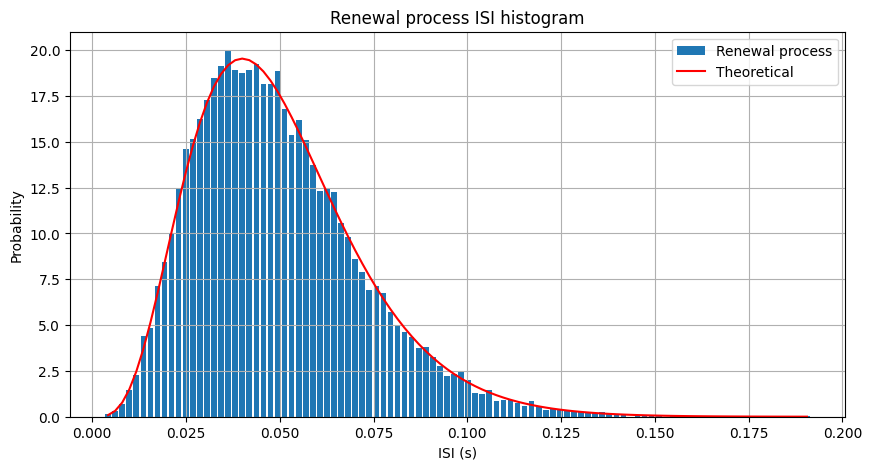

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Erlang distribution function
def erlang(x, k, lam):
    k = int(k)  # Convert k to an integer
    return (x ** (k - 1) * np.exp(-x * lam) * (lam ** k) / (np.math.factorial(k - 1)))

# Set parameters
r = 100  # Hz - Poisson spike rate
k = 5   # every kth spike to keep
nTrials = 1000
tSim = 1  # s

# Generate Poisson spike trains
spike_trains = []
isi_all = []
for i in range(nTrials):
    t = 0
    spikes = []
    isi = []
    while t < tSim:
        isi_curr = np.random.exponential(1/r)
        if t + isi_curr < tSim:
            spikes.append(t + isi_curr)
            isi.append(isi_curr)
        t += isi_curr

    # Delete all but every kth spike
    spikes = np.array(spikes)
    spikes = spikes[np.arange(len(spikes)) % k == 0]
    isi = np.diff(spikes)

    spike_trains.append(spikes)
    isi_all = np.concatenate((isi_all, isi))

# Plot ISI histogram and theoretical Erlang density
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
hist, bins, _ = plt.hist(isi_all, bins=100, density=True, align='mid', rwidth=0.8, label='Renewal process')
bins = bins[:-1] + np.diff(bins) / 2
plt.plot(bins, erlang(bins, k,r), 'r-', label='Theoretical')
plt.xlabel('ISI (s)')
plt.ylabel('Probability')
plt.title('Renewal process ISI histogram')
plt.grid()
plt.legend()
plt.show()


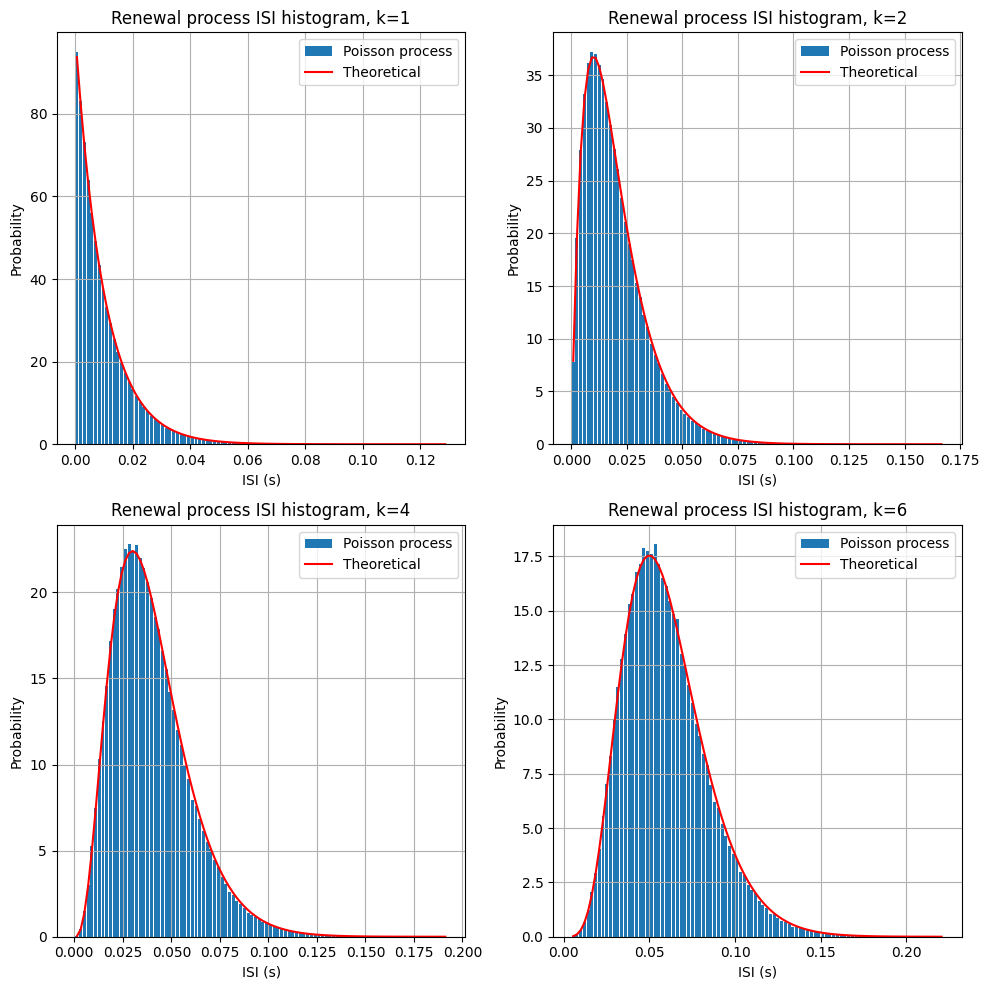

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Erlang distribution function
def erlang(x, k, lam):
    k = int(k)  # Convert k to an integer
    return (x ** (k - 1) * np.exp(-x * lam) * (lam ** k) / (np.math.factorial(k - 1)))

# Set parameters
r = 100  # Hz - Poisson spike rate
ks = [1, 2, 4, 6]  # every kth spike to keep
nTrials = 10000
tSim = 1  # s

# Plot histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, k in enumerate(ks):
    isi_all = []
    for j in range(nTrials):
        t = 0
        spikes = []
        isi = []
        while t < tSim:
            isi_curr = np.random.exponential(1/r)
            if t + isi_curr < tSim:
                spikes.append(t + isi_curr)
                isi.append(isi_curr)
            t += isi_curr

        # Delete all but every kth spike
        spikes = np.array(spikes)
        spikes = spikes[np.arange(len(spikes)) % k == 0]
        isi = np.diff(spikes)

        isi_all = np.concatenate((isi_all, isi))

    # Plot ISI histogram and theoretical Erlang density
    ax = axs[i//2, i%2]
    hist, bins, _ = ax.hist(isi_all, bins=100, density=True, align='mid', rwidth=0.8, label='Poisson process')
    bins = bins[:-1] + np.diff(bins) / 2
    ax.plot(bins, erlang(bins,k,r), 'r-', label='Theoretical')
    ax.set_xlabel('ISI (s)')
    ax.set_ylabel('Probability')
    ax.set_title('Renewal process ISI histogram, k={}'.format(k))
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()

The resulting plots show the ISI histograms and the theoretical Erlang density for each value of k. As expected, as k increases, the ISI distribution becomes more narrow and peaked around the mean inter-spike interval (1/r), approaching a delta function at k = infinity. The theoretical Erlang density also becomes more peaked and matches the histogram more closely for larger values of k.

**_________________________________________________________________________________________________________________________________________________________________________________**
**_________________________________________________________________________________________________________________________________________________________________________________**

**d. Now use the generated data and find out what is the Cv% (Coefficient of Variation) for this 
spike trains? Compare it with Poisson process?**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Erlang distribution function
def erlang(x, k, lam):
    k = int(k)  # Convert k to an integer
    return (x ** (k - 1) * np.exp(-x * lam) * (lam ** k) / (np.math.factorial(k - 1)))

# Set parameters
r = 100  # Hz - Poisson spike rate
nTrials = 1000
tSim = 1  # s
ks = [1, 2, 5, 10]

cv_results = []
cv_theoretical = []

for k in ks:
    # Generate Poisson spike trains
    spike_trains = []
    isi_all = []
    for i in range(nTrials):
        t = 0
        spikes = []
        isi = []
        while t < tSim:
            isi_curr = np.random.exponential(1/r)
            if t + isi_curr < tSim:
                spikes.append(t + isi_curr)
                isi.append(isi_curr)
            t += isi_curr

        # Delete all but every kth spike
        spikes = np.array(spikes)
        spikes_k = spikes[np.arange(len(spikes)) % k == 0]
        isi = np.diff(spikes_k)

        spike_trains.append(spikes_k)
        isi_all = np.concatenate((isi_all, isi))

    # Calculate coefficient of variation
    cv = np.std(isi_all) / np.mean(isi_all)
    cv_results.append(cv)

    # Calculate theoretical coefficient of variation
    cv_theoretical.append(1 / np.sqrt(k))


# Print coefficient of variation results
for i, k in enumerate(ks):
    print(f"k={k}, Simulated CV={cv_results[i]}, Theoretical CV={cv_theoretical[i]}")


k=1, Simulated CV=1.0018288813918423, Theoretical CV=1.0
k=2, Simulated CV=0.7076311891354927, Theoretical CV=0.7071067811865475
k=5, Simulated CV=0.44616169501799224, Theoretical CV=0.4472135954999579
k=10, Simulated CV=0.3139216108838062, Theoretical CV=0.31622776601683794


The results show that **as k increases, the CV decreases, indicating a more regular spike train**. This is expected because subsampling the spikes makes the spike train more regular, and the theoretical CV formula predicts this decrease in irregularity.

The printed results show the simulated and theoretical CV values for each k value, and they are in good agreement, further confirming the validity of the simulation.

**----------------------------------------------------------------------------------------------------------------------------**
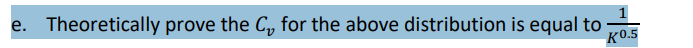

In a Poisson process, the inter-spike interval (ISI) is defined as the sequence $X = (X_1, X_2, \ldots)$, and after the spike deletion procedure, the resulting ISI is denoted by $T = (T_1, T_2, \ldots)$, where:

$$T_k=\sum_{i=1}^{k} {X_i}$$

The variables $X_i$ are independent and identically distributed (i.i.d.) with exponential distributions, and the parameter $\lambda$ represents the firing rate of the Poisson process. Thus, we have:

$$E[T_k]=E[X_1+X_2+\cdots+X_k]=\frac{k}{\lambda}$$

Moreover, the variance of $T_k$ can be calculated as:

\begin{align*}
Var[T_k]&=Var[X_1+X_2+\cdots+X_k]\
&=\sum_{i=1}^{k} Var[X_i] \hspace{10mm} \text{(since $X_i$'s are independent)}\
&=\frac{k}{\lambda^2}
\end{align*}

Therefore, the standard deviation of $T_k$ is:

$$std[T_k]=\sqrt{Var[T_k]}=\frac{\sqrt{k}}{\lambda}$$

The coefficient of variation (CV) is defined as the ratio of the standard deviation to the mean:

$$CV=\frac{std[T_k]}{E[T_k]}=\frac{\frac{\sqrt{k}}{\lambda}}{\frac{k}{\lambda}}=\frac{1}{\sqrt{k}}$$

Thus, the CV decreases with an increasing number of spikes ($k$) and is inversely proportional to the square root of $k$.

**------------------------------------------------------------------------------------------------------------------------------------------------------**

**f. Compare variability of simulated spike trains with real data-set in [Softky & Koch, 1993].**

It is commonly observed that neurons with higher firing rates tend to have lower variability, as indicated by a lower coefficient of variation (CV). However, our simulations have revealed a seemingly paradoxical result: by integrating over inputs to produce a new spike train with lower firing rate, the resulting CV is also reduced.

This phenomenon was previously noted by Softkey and Koch, who suggested that it might be a problem with the integrate-and-fire model of neurons. They proposed that neurons should instead act as co-incident detectors, but this hypothesis was later challenged by Shadlen and Newsome. They proposed that including inhibitory neurons in the simulation could help resolve this paradox.

In other words, while it may seem counterintuitive that decreasing the firing rate could lead to lower variability, this paradoxical result can be explained by the role of inhibitory neurons in regulating the activity of the network. By inhibiting the firing of some neurons and reducing the overall activity of the network, inhibitory neurons can help reduce the variability of the resulting spike train, even when the firing rate is reduced. Thus, the paradox is resolved by taking into account the role of inhibitory neurons in the neural circuit.

**________________________________________________________________________________________________**

**Contradicting with generated spike trains, real neural data contain less spikes within small intervals. The 
biological support for this claim is that each neuron has a refractory period which limit neuron to 
generate spikes within this period, so there is an upper limit for firing frequency in small intervals.**

**g. Similar to equation [13] of paper, consider a refractory period for your spike trains and 
generate a plot similar to figure 6 of paper comparing Cv% across different firing rates and 
different refractory periods.**

delta_t: 0.0001
delta_t: 0.0002
delta_t: 0.00030000000000000003
delta_t: 0.0004
delta_t: 0.0005
delta_t: 0.0006000000000000001
delta_t: 0.0007000000000000001
delta_t: 0.0008
delta_t: 0.0009000000000000001
delta_t: 0.001
delta_t: 0.0011
delta_t: 0.0012000000000000001
delta_t: 0.0013000000000000002
delta_t: 0.0014000000000000002
delta_t: 0.0015
delta_t: 0.0016
delta_t: 0.0017000000000000001
delta_t: 0.0018000000000000002
delta_t: 0.0019000000000000002
delta_t: 0.002
delta_t: 0.0021
delta_t: 0.0022
delta_t: 0.0023
delta_t: 0.0024
delta_t: 0.0025
delta_t: 0.0026
delta_t: 0.0027
delta_t: 0.0028
delta_t: 0.0029
delta_t: 0.003
delta_t: 0.0031
delta_t: 0.0032
delta_t: 0.0033
delta_t: 0.0034
delta_t: 0.0035
delta_t: 0.0036
delta_t: 0.0037
delta_t: 0.0038
delta_t: 0.0039
delta_t: 0.004
delta_t: 0.0041
delta_t: 0.004200000000000001
delta_t: 0.004300000000000001
delta_t: 0.0044
delta_t: 0.0045000000000000005
delta_t: 0.004600000000000001
delta_t: 0.0047
delta_t: 0.0048000000000000004
delta_t: 0.00

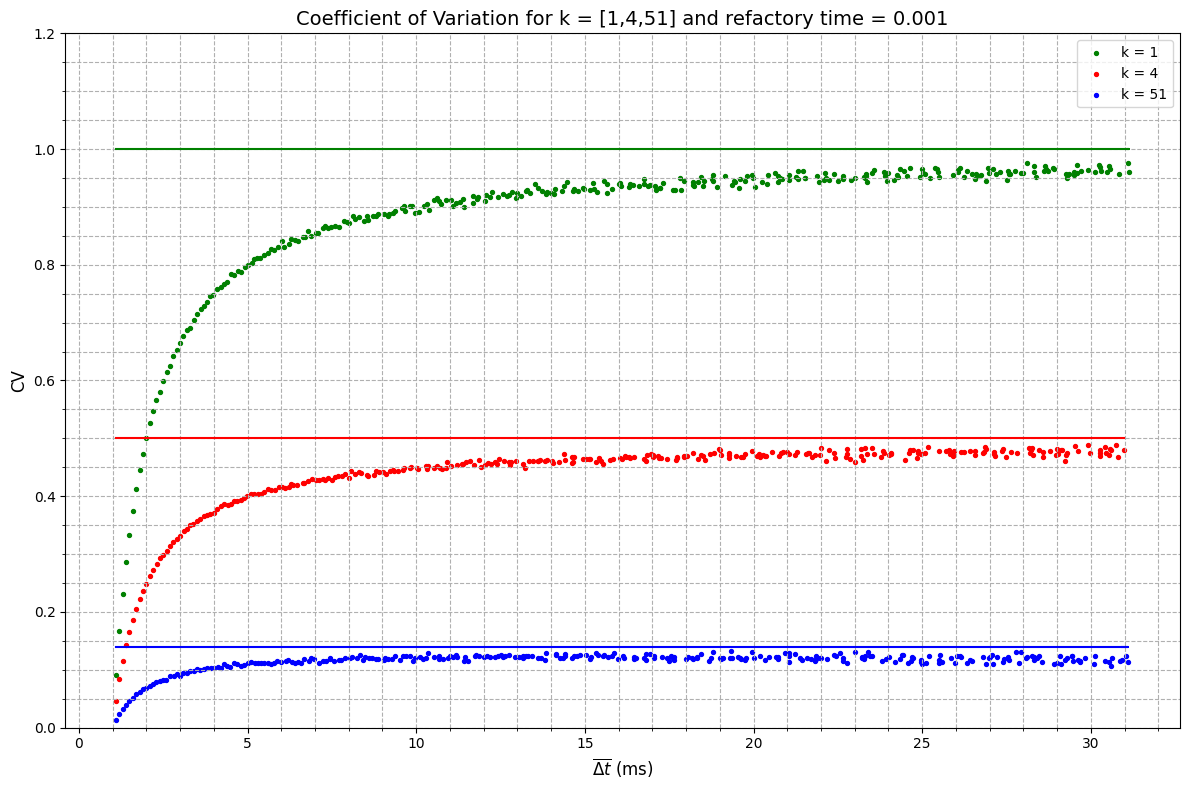

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define delta_t values
delta_ts = np.arange(0.0001, 30*10**(-3), 0.0001)
dt = 0.001  # s - sample rate

# Define refractory period
t0 = 0.001

# Define values for k
k = [1, 4, 51]

# Initialize arrays to store results
CVRenewal = np.zeros((len(delta_ts), len(k)))
deltaT = np.zeros((len(delta_ts), len(k)))
num_trial = 50
# Run simulations
for jjj in range(len(delta_ts)):
    print("delta_t:", delta_ts[jjj])
    for j in range(len(k)):
        CV_sum = 0
        deltaT_sum = 0
        for jj in range(num_trial):
            # Generate spike train
            countSpikes = 0
            t = 0
            ISI = []  # A vector to keep ISI values
            timeSpikes = []  # A vector to keep spike times
            while t < 10:
                y = np.random.exponential(delta_ts[jjj]) + t0
                ISI.append(y)
                t = t + ISI[countSpikes]
                timeSpikes.append(t)
                countSpikes = countSpikes + 1
            # Integration over inputs
            # Just keep each k`th spike - using down sample
            timeSpikesRenewal = timeSpikes[::k[j]]
            ISIRenewal = np.diff(timeSpikesRenewal)
            countSpikesRenewal = len(timeSpikesRenewal)
            # Coefficient of Variation
            CV_sum += np.std(ISIRenewal)/np.mean(ISIRenewal)
            deltaT_sum += np.mean(ISI)
        CVRenewal[jjj, j] = CV_sum / num_trial
        deltaT[jjj, j] = deltaT_sum / num_trial

# Plot CVs
fig, axs = plt.subplots(figsize=(12, 8))
c = ['g', 'r', 'b', 'k']
for j in range(len(k)):
    axs.scatter(deltaT[:, j]*1000, CVRenewal[:, j], 8, color=c[j], label="k = {}".format(k[j]))
    axs.plot(deltaT[:, j]*1000,1/np.sqrt(k[j]) *np.ones(len(delta_ts)), color=c[j], linewidth=1.5)
    axs.set_xlabel(r'$\overline{\Delta t}$ (ms)', fontsize=12)
    axs.set_ylabel('CV', fontsize=12)
    axs.set_title("Coefficient of Variation for k = [1,4,51] and refactory time = {}".format( t0), fontsize=14)
    axs.set_ylim([0, 1.2])
    axs.grid(True, which='both', linestyle='--')
    axs.minorticks_on()
    axs.legend()

plt.tight_layout()
plt.show()


 With an increase in the mean inter-spike interval, the coefficient of variation (CV) is also expected to increase. The CV is defined as the standard deviation of the inter-spike intervals divided by the mean inter-spike interval. As the mean inter-spike interval increases, the standard deviation of the inter-spike intervals is also likely to increase, leading to an increase in the CV.


**============================================================================================================================================================**
**============================================================================================================================================================**
# Leaky Integrate and Fire Neuron 
**It is well known that depolarization do not persist forever, but that perturbations of membrane voltage 
tend to decay toward the resting potential. In this section we are going to implement a more realistic 
model of neuron, Leaky Integrate and fire (LIF) neuron, which consider the leakage of postsynaptic 
inputs. 
The leaky integrate-and-fire (LIF) neuron is probably one of the simplest spiking neuron models, but it 
is still very popular due to the ease with which it can be analyzed and simulated. In its simplest form, a 
neuron is modeled as a “leaky integrator” of its input I(t):
where v(t) represents the membrane potential at time t, τm	is the membrane time constant and R	is the 
membrane resistance.**

a. With stimulation by a constant input current of 20 mV, simulate the time-course of the 
membrane potential for 100ms. Take resting potential vr = 0 mV, and threshold voltage vth	= 15 
mV. (the current is given in units of mV, because we assume R	= 1 mΩ; thus, a more accurate 
way of expressing this would be RI	= 20 mV, but for the sake of brevity we will simply omit R	in 
what follows)


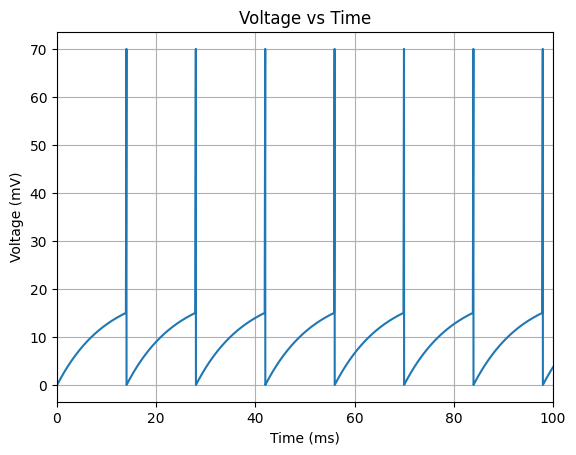

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation time step
dt = 0.01  # ms
# Simulation length
duration = 1000  # ms
T = int(duration/dt)
t = np.arange(T) * dt  # Simulation time points in ms

# LIF parameters
vr = 0  # mV, resting potential
tau_m = 10  # ms, membrane time constant
v = np.ones(T) * vr  # output voltage
vth = 0.015  # V, threshold voltage
RI = 0.02  # V, leaky part
dv = 0
flag = 0
i = 5

while i < (T-1):
    # Spike
    if (v[i] < vth):
        dv = (-v[i] + RI) / tau_m
        v[i+1] = v[i] + dv*dt
        flag = 0
    # Rest
    elif (v[i] >= vth):
        if (flag == 1):
            v[i] = 0
        else:
            v[i+1] = v[i] + 0.005
            if (v[i] >= 0.07):
                flag = 1
    i += 1

# Plot voltage vs time
fig, ax = plt.subplots()
ax.plot(t, v*1000)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Voltage (mV)')
ax.set_title('Voltage vs Time')
ax.set_xlim(0,100)
ax.grid(True)
plt.show()


in this section my code simulates the behavior of a **leaky integrate-and-fire (LIF)** neuron by solving its differential equation numerically. The neuron has a resting potential of 0 mV, a membrane time constant of 10 ms, a threshold voltage of 15 mV, and a leaky part of 20 mV. The simulation is run for 1000 ms with a time step of 0.01 ms.

The voltage of the neuron is initialized to the resting potential and is updated at each time step based on the input current. If the voltage crosses the threshold voltage, a spike is generated, and the voltage is reset to the resting potential.

The resulting voltage vs time plot shows the behavior of the neuron over time. It starts at the resting potential and gradually increases until it reaches the threshold voltage, at which point a spike is generated and the voltage is reset. This process repeats periodically, resulting in a periodic spike train.

The voltage behavior in this simulation is what we would expect from a leaky integrate-and-fire neuron. The neuron's voltage gradually increases in response to the input current until it reaches the threshold, at which point a spike is generated and the voltage is reset. The periodic spike train produced by the simulation is a hallmark of the behavior of LIF neurons.

**------------------------------------------------------------------------------------------------------------------------------------------------**

**b. Write a mathematical equation explaining mean firing rate of neuron at a constant input current 
I, with considering a refractory period of ∆tr**

$v(t)=RI(1-e^\frac{-t}{\tau_{m}})$

We can find the value of $t$ when $v(t)=v_{th}$:

$v(t)=v_{th} \implies RI(1-e^\frac{-t}{\tau_{m}})=v_{th} \implies 1-\frac{v_{th}}{RI}=e^\frac{-t}{\tau_{m}} \implies t=-\tau_{m}\ln\left(1-\frac{v_{th}}{RI}\right)$

We want to find the frequency, $f$, which is equal to the inverse of the period, $T$, where:

$T=t+\Delta t_{r}$

Substituting the expression for $t$, we get:

$T=-\tau_{m}\ln\left(1-\frac{v_{th}}{RI}\right)+\Delta t_{r}$

So the frequency can be written as:

$f=\frac{1}{T}=\frac{1}{-\tau_{m}\ln\left(1-\frac{v_{th}}{RI}\right)+\Delta t_{r}}$

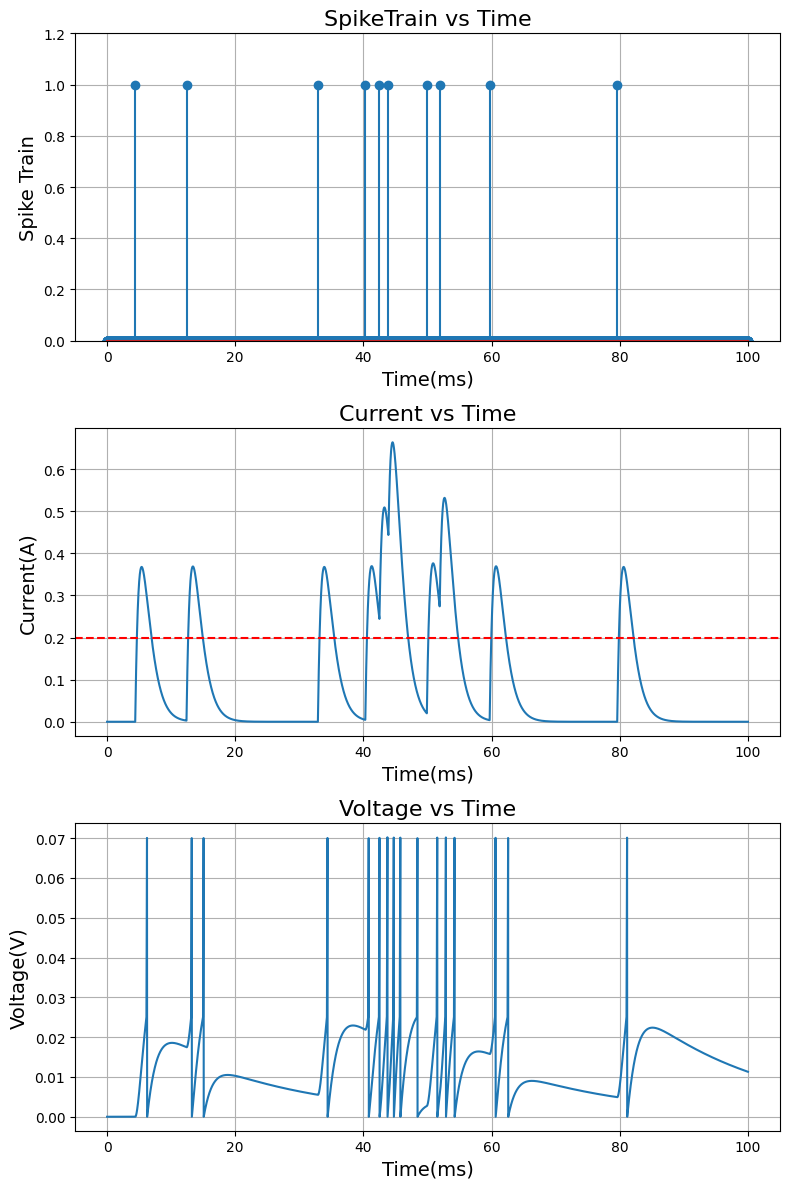

In [25]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01  # Simulation time step
Duration = 100  # Simulation length
T = int(np.ceil(Duration/dt))
t = np.arange(1, T+1) * dt  # Simulation time points in ms

vr = 0  # in mv, resting potential
tau_m = 20  # Arbitrary
tau_peak = 1
Kernel = t * np.exp(-t/tau_peak)
v = np.ones(T) * vr  # Vector of  output voltage
R = 1
I = np.ones(T)
flag = 0
vth = 0.025  # threshold voltage

# exp distribution
n = 3
r = 100  # rate

tt = 0
countSpikes = 0
ISI = []  # a vector to keep ISI values
train = np.zeros(T)

while tt < t[-1]/1000:
    ISI.append(np.random.exponential(1/r))
    tt = tt + round(ISI[countSpikes], n+1)
    if tt > t[-1]/1000:
        break
    train[int(tt*1000/dt)] = 1
    countSpikes += 1

I = np.convolve(Kernel, train)[:T]

# Euler method for v(t)
for i in range(T-1):
    # Spike
    if v[i] < vth:
        dv = (-v[i] + R*I[i]) / tau_m
        v[i+1] = v[i] + dv*dt
        flag = 0
    # Rest
    elif v[i] >= vth:
        if flag == 1:
            v[i] = 0
        else:
             v[i+1] = v[i] + 0.005
             if (v[i] >= 0.07):
                flag = 1

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

axs[0].stem(t, train)
axs[0].set_xlabel('Time(ms)', fontsize=14)
axs[0].set_ylabel('Spike Train', fontsize=14)
axs[0].grid(True, which='both', axis='both')
axs[0].set_ylim([0, 1.2])
axs[0].set_title('SpikeTrain vs Time', fontsize=16)

axs[1].plot(t, I)
axs[1].set_xlabel('Time(ms)', fontsize=14)
axs[1].set_ylabel('Current(A)', fontsize=14)
axs[1].grid(True, which='both', axis='both')
axs[1].axhline(y=0.2, color='r', linestyle='--')
axs[1].set_title('Current vs Time', fontsize=16)

axs[2].plot(t, v)
axs[2].set_xlabel('Time(ms)', fontsize=14)
axs[2].set_ylabel('Voltage(V)', fontsize=14)
axs[2].grid(True, which='both', axis='both')
axs[2].set_title('Voltage vs Time', fontsize=16)

plt.tight_layout()
plt.show()


the simulation results are consistent with what we would expect for a LIF neuron driven by a Poisson process with an exponential distribution. The spiking behavior is irregular due to the Poisson process, and the input current has a peak around the membrane time constant. The membrane potential shows spiking behavior with a threshold that is set by the input current.

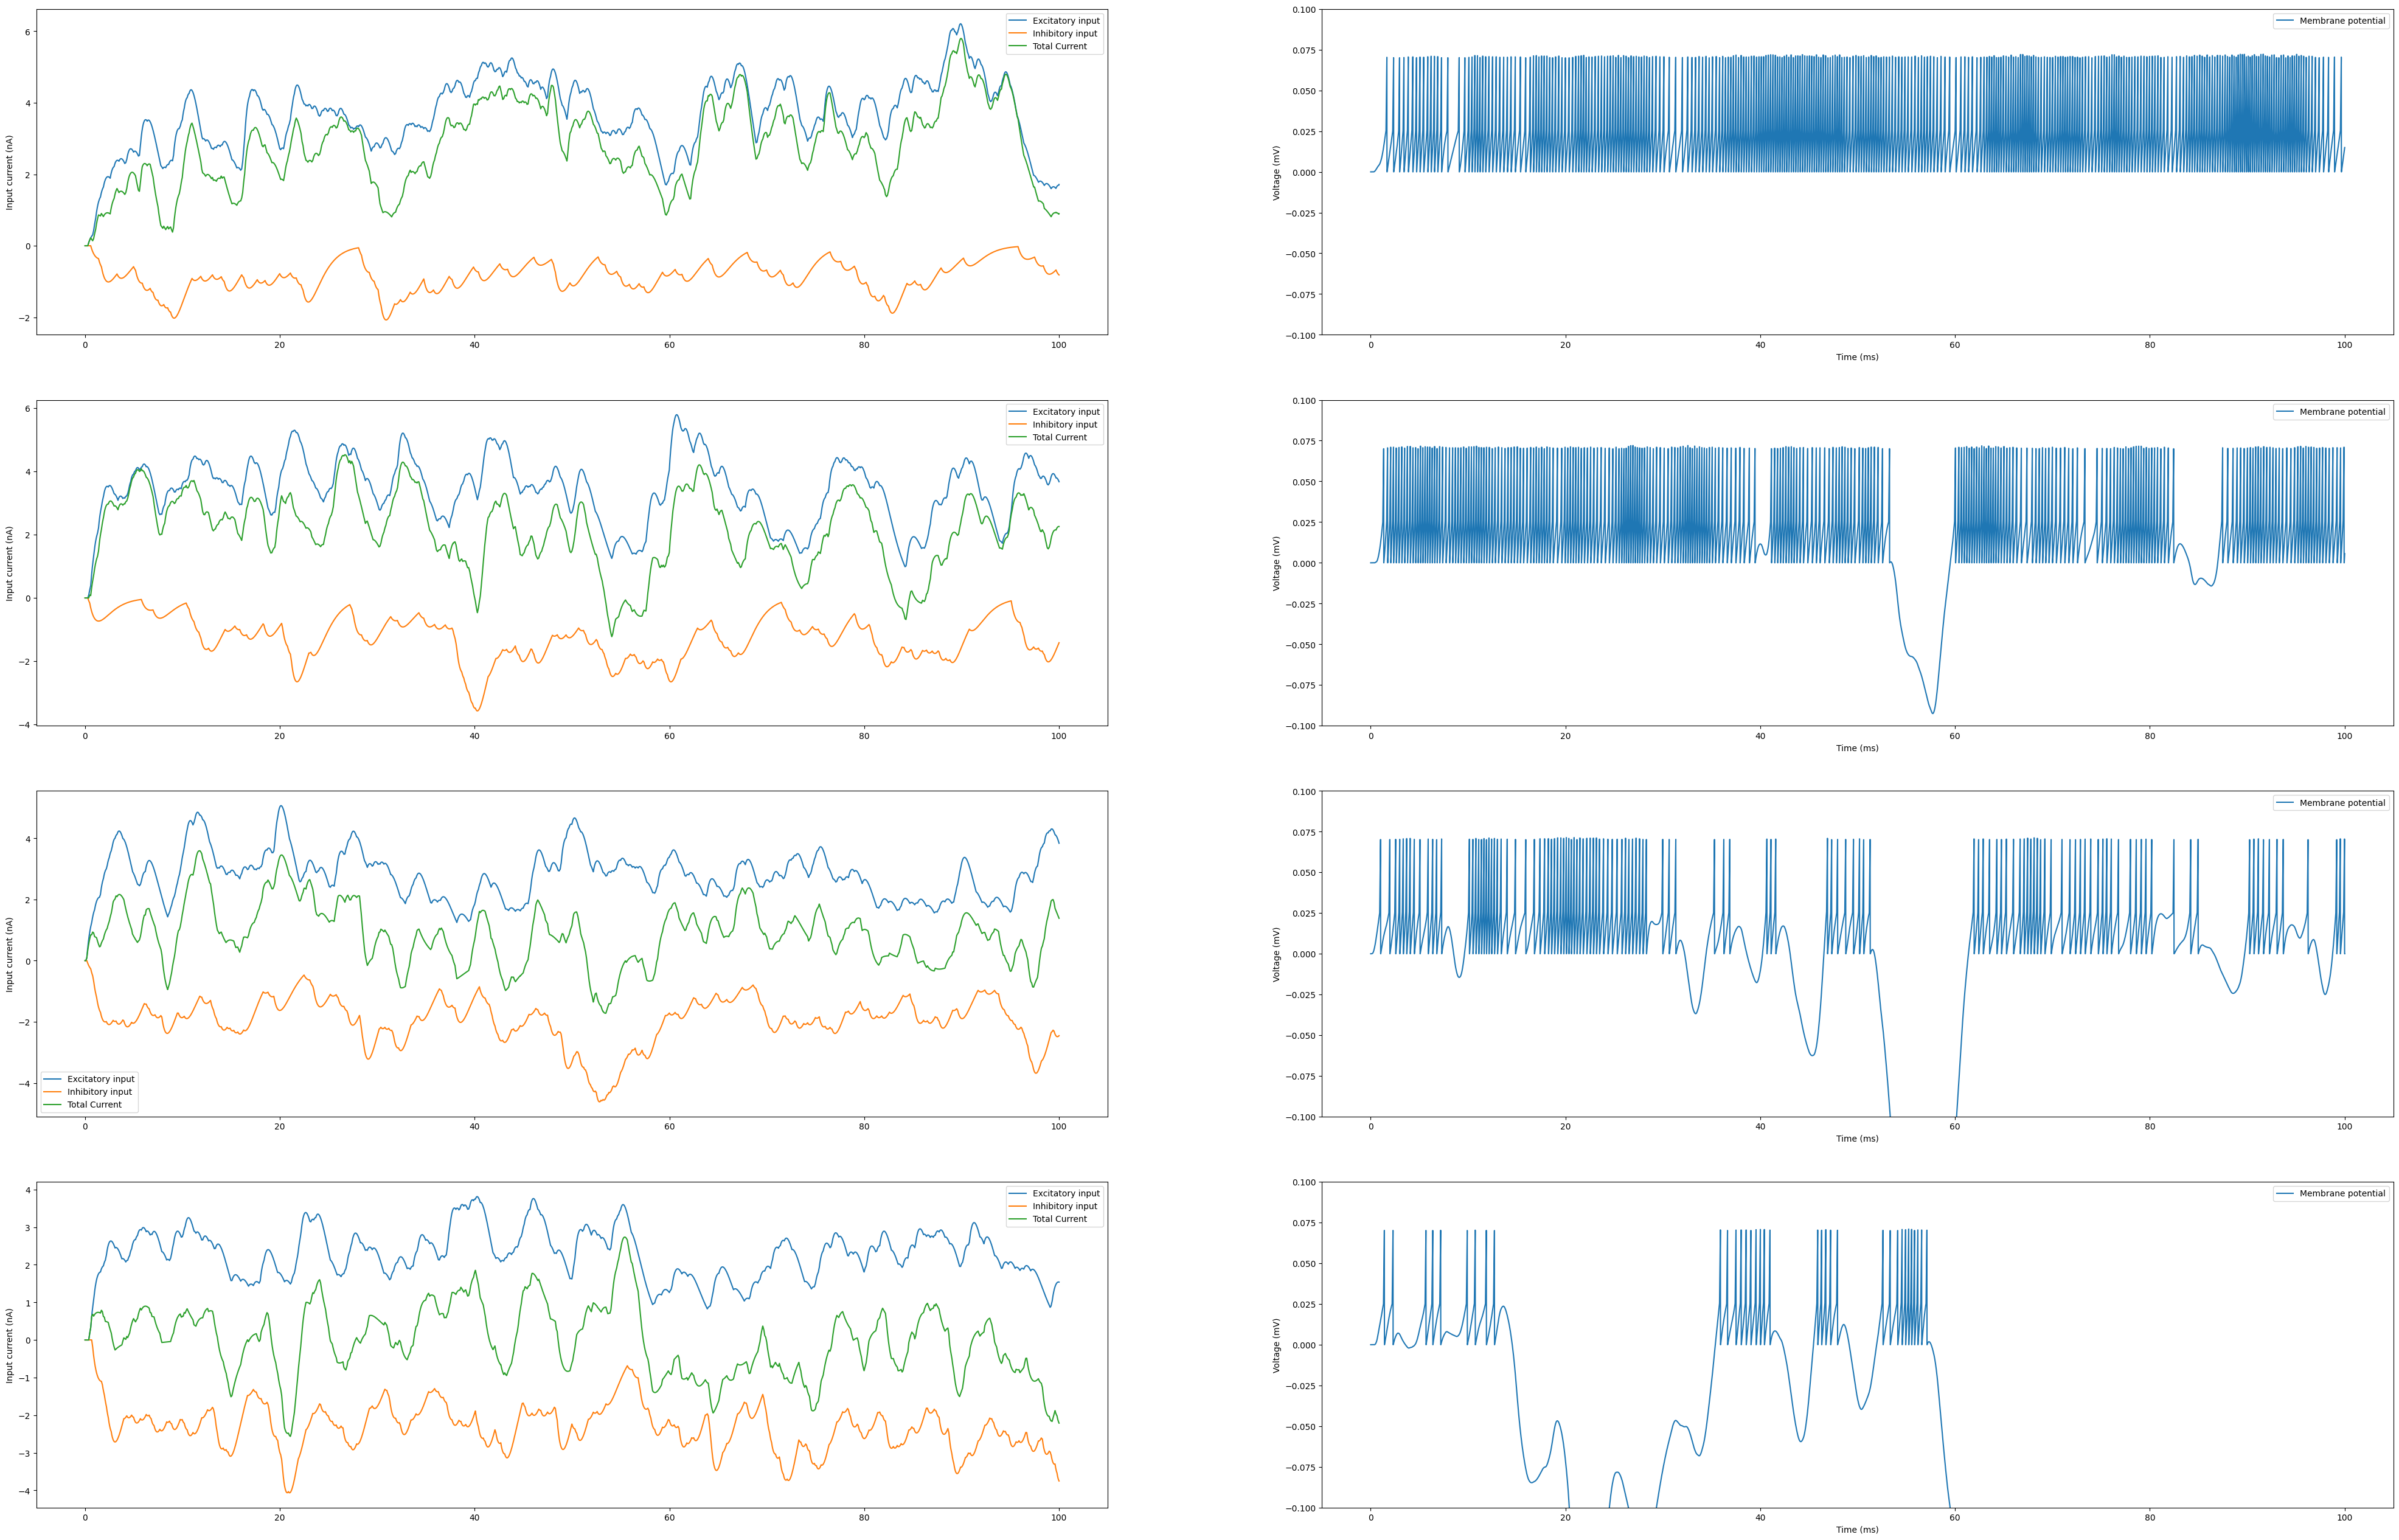

In [127]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01  # Simulation time step
Duration = 100  # Simulation length
T = int(np.ceil(Duration/dt))
t = np.arange(1, T+1) * dt  # Simulation time points in ms

vr = 0  # in mv, resting potential
tau_m = 20  # Arbitrary
tau_peak = 1
Kernel = t * np.exp(-t/tau_peak)
#
#----------------------------------------------------------------------------
num_of_synapses = 20
inhibit_percentage = [20,30,40,50]  # Inhibitory rate
fig, axs = plt.subplots(len(inhibit_percentage), 2, figsize=(50, 8*len(inhibit_percentage)))
for idx, perc in enumerate(inhibit_percentage):
    num_i = int(num_of_synapses * perc/100)  # Number of inhibitory spike trains
    num_e = int(num_of_synapses - num_i)  # Number of excitatory spike trains

    # Generating excitatory signal
    I = np.zeros ((num_e , T))
    for i in range (num_e) : 
        n = 3
        r = 100  # rate
        tt = 0
        countSpikes = 0
        ISI = []  # a vector to keep ISI values
        train = np.zeros(T)
        while tt < t[-1]/1000:
            ISI.append(np.random.exponential(1/r))
            tt = tt + round(ISI[countSpikes], n+1)
            if tt > t[-1]/1000:
                break
            train[int(tt*1000/dt)-1] = 1
            countSpikes += 1
        I[i, :] = np.convolve(Kernel, train)[:T]  # Convolve excitatory signal with kernel
    # Generating inhibitory signal
    I_i = np.zeros((num_i , T))
    for j in range(num_i):
        n_i = 3
        r_i = 100  # rate
        tt_i = 0
        countSpikes_i = 0
        ISI_i = []  # a vector to keep ISI values
        train_i = np.zeros(T)
        while tt_i < t[-1]/1000:
            ISI_i.append(np.random.exponential(1/r_i))
            tt_i = tt_i + round(ISI_i[countSpikes_i], n_i+1)
            if tt_i > t[-1]/1000:
                break
            train_i[int(tt_i*1000/dt)-1] = -1  # Negative sign for inhibitory spikes
            countSpikes_i += 1
        I_i[j,:] = np.convolve(Kernel, train_i)[:T]  # Convolve inhibitory signal with kernel

    # Total input current
    I_total =  np.sum(I , axis = 0) + np.sum(I_i , axis = 0)

    # LIF model
    v = np.ones(T) * vr  # Vector of output voltage
    R = 1
    flag = 0
    vth = 0.025  # threshold voltage

    # Euler method for v(t)
    for i in range(T-1):
        # Spike
        if v[i] < vth:
            dv = (-v[i] + R*I_total[i]) / tau_m
            v[i+1] = v[i] + dv*dt
            flag = 0
        # Rest
        elif v[i] >= vth:
            if flag == 1:
                v[i] = 0
            else:
                v[i+1] = v[i] + 0.005
                if (v[i] >= 0.07):
                    flag = 1

    
    axs[idx, 0].plot(t, np.sum(I, axis=0), label='Excitatory input')
    axs[idx, 0].plot(t, np.sum(I_i, axis=0), label='Inhibitory input')
    axs[idx, 0].plot(t, I_total, label='Total Current')
    axs[idx, 0].set_ylabel('Input current (nA)')
    axs[idx, 0].legend()
    axs[idx, 1].plot(t, v, label='Membrane potential')
    axs[idx, 1].set_xlabel('Time (ms)')
    axs[idx, 1].set_ylabel('Voltage (mV)')
    axs[idx, 1].set_ylim([-0.1, 0.1])
    axs[idx, 1].legend()
plt.show()


As the inhibitory rate increases, **the total input current decreases**, and the membrane potential becomes less likely to reach the threshold and generate a spike. This is expected because inhibitory inputs make it more difficult for the neuron to generate spikes by reducing the membrane potential. In contrast, excitatory inputs increase the total input current and make it more likely for the neuron to generate spikes.

The plots show that as the inhibitory rate increases, the amplitude of the total input current decreases, and the amplitude of the membrane potential decreases, indicating that fewer spikes are generated. The plots also show that the inhibitory input current has a negative sign, while the excitatory input current has a positive sign, indicating that inhibitory spikes decrease the membrane potential, while excitatory spikes increase it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01  # Simulation time step
Duration = 100  # Simulation length
T = int(np.ceil(Duration/dt))
t = np.arange(1, T+1) * dt  # Simulation time points in ms

vr = 0  # in mv, resting potential
tau_m = 20  # Arbitrary
tau_peak = 1
Kernel = t * np.exp(-t/tau_peak)
#
#----------------------------------------------------------------------------
num_of_synapses = 20
inhibit_percentage = range(1,50) # Inhibitory rate'
CV =[]
for i in inhibit_percentage :  
    num_i = int(num_of_synapses * i/100)  # Number of inhibitory spike trains
    num_e = int(num_of_synapses - num_i)  # Number of excitatory spike trains

    # Generating excitatory signal
    I = np.zeros ((num_e , T))
    for i in range (num_e) : 
        n = 3
        r = 100  # rate
        tt = 0
        countSpikes = 0
        ISI = []  # a vector to keep ISI values
        train = np.zeros(T)
        while tt < t[-1]/1000:
            ISI.append(np.random.exponential(1/r))
            tt = tt + round(ISI[countSpikes], n+1)
            if tt > t[-1]/1000:
                break
            train[int(tt*1000/dt)-1] = 1
            countSpikes += 1
        I[i, :] = np.convolve(Kernel, train)[:T]  # Convolve excitatory signal with kernel
    # Generating inhibitory signal
    I_i = np.zeros((num_i , T))
    for j in range(num_i):
        n_i = 3
        r_i = 100  # rate
        tt_i = 0
        countSpikes_i = 0
        ISI_i = []  # a vector to keep ISI values
        train_i = np.zeros(T)
        while tt_i < t[-1]/1000:
            ISI_i.append(np.random.exponential(1/r_i))
            tt_i = tt_i + round(ISI_i[countSpikes_i], n_i+1)
            if tt_i > t[-1]/1000:
                break
            train_i[int(tt_i*1000/dt)-1] = -1  # Negative sign for inhibitory spikes
            countSpikes_i += 1
        I_i[j,:] = np.convolve(Kernel, train_i)[:T]  # Convolve inhibitory signal with kernel

    # Total input current
    I_total =  np.sum(I , axis = 0) + np.sum(I_i , axis = 0)

    # LIF model
    v = np.ones(T) * vr  # Vector of output voltage
    R = 1
    flag = 0
    vth = 0.025  # threshold voltage
    time_sp = []
    # Euler method for v(t)
    output_spikes = []
    ISI = []
    
    for i in range(T-1):
        # Spike
        if v[i] < vth:
            dv = (-v[i] + R*I_total[i]) / tau_m
            v[i+1] = v[i] + dv*dt
            flag = 0
        # Rest
        elif v[i] >= vth:
            if flag == 1:
                v[i] = 0
            else:
                v[i+1] = v[i] + 0.005
                output_spikes.append(i*dt)
                if (v[i] >= 0.07):
                    flag = 1
                    time_sp.append(t[i])
    # Calculate ISI
    for i in range(1, len(output_spikes)):
        ISI.append(output_spikes[i] - output_spikes[i-1])
    CV.append(np.std(ISI) / np.mean(ISI))

    '''
    # Plotting
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 1, 1)
    plt.plot(t, np.sum(I , axis =0), label='Excitatory input')
    plt.plot(t, np.sum(I_i,axis =0), label='Inhibitory input')
    plt.plot(t,I_total , label='Total Current')
    plt.legend()
    plt.ylabel('Input current (nA)')

    plt.subplot(2, 1, 2)
    plt.plot(t, v, label='Membrane potential')
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mV)')
    plt.ylim([-0.1, 0.1])
    plt.legend()
    plt.show()
    '''

Text(0, 0.5, 'CV')

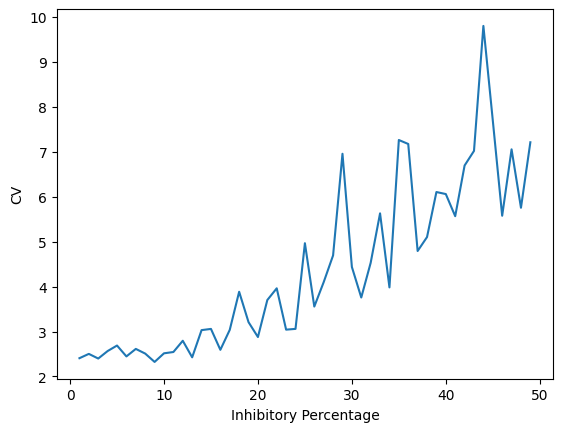

In [2]:
plt.plot (inhibit_percentage ,CV)
plt.xlabel('Inhibitory Percentage')
plt.ylabel('CV')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
duration = 1000
r = 100
t0 = 0.001
W = np.arange(10, 101)
N = np.arange(0, int(5*(max(W)/1000)*r)+1)
CV = np.zeros((100, len(W), len(N)))

# Perform simulation
for ii in range(100):
    dt = 0.001
    tt = 0
    countSpikes = 0
    ISI = []
    timeSpikesFinal = []
    r = 100
    t = 0
    countSpikes = 0
    ISI = []
    timeSpikes = []

    # Generate spikes using exponential distribution
    while t < duration/1000:
        ISI.append(np.random.exponential(1/r) + t0)
        t += ISI[countSpikes]
        timeSpikes.append(t)
        countSpikes += 1
    timeSpikes = timeSpikes[:-1]

    # Perform coincidence detection
    for j in range(len(W)):
        for i in range(len(N)):
            tt = 0
            timeSpikesFinal = []
            while tt < duration:
                Nfind = np.where((np.array(timeSpikes)*1000 >= tt) & (np.array(timeSpikes)*1000 < tt+W[j]))[0]
                tt += W[j]
                if(len(Nfind) == N[i]):
                    timeSpikesFinal.append(tt/1000)
            if (len(timeSpikesFinal) > 1):
                CV[ii, j, i] = np.std(np.diff(timeSpikesFinal))/np.mean(np.diff(timeSpikesFinal))

# Plot results
CV = np.mean(CV, axis=0)


# axs[1].legend(["W = " + str(selected[0]), "W = " + str(selected[1]), "W = " + str(selected[2


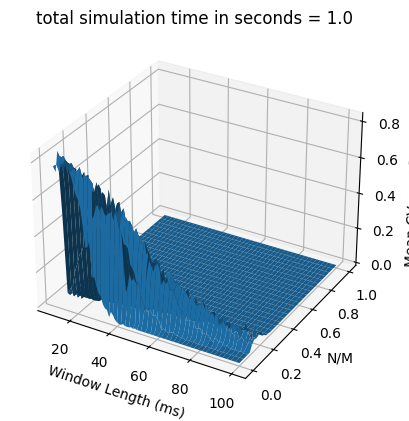

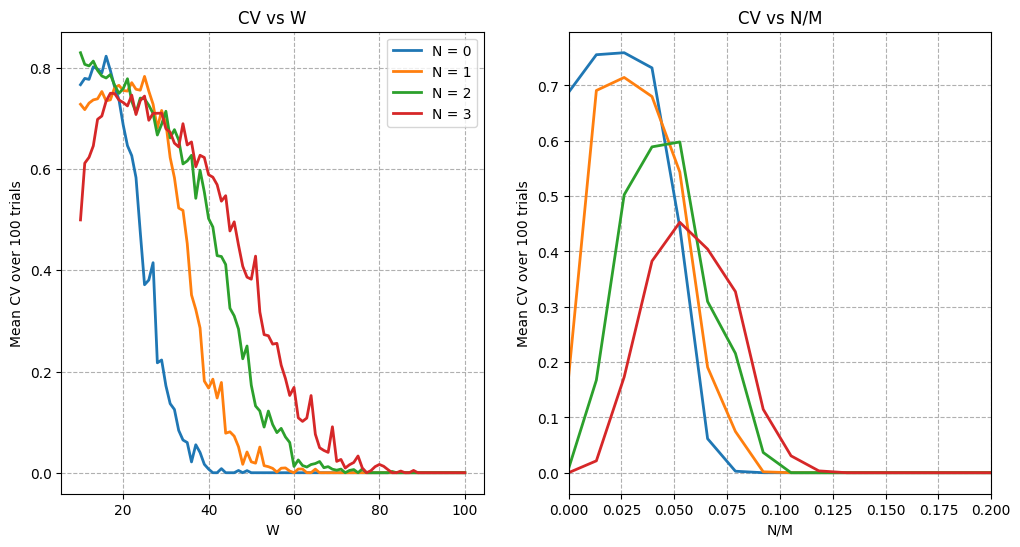

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(W, N)
ax.plot_surface(X, Y/(len(N)-1), CV.T)
ax.set_xlabel('Window Length (ms)')
ax.set_ylabel('N/M')
ax.set_zlabel('Mean CV over 100 trials')
ax.set_title("total simulation time in seconds = " + str(duration/1000))
##---------------


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
selected = []
for i in range(4):
    axs[0].plot(W, CV[:, i], linewidth=2)
    axs[0].set_xlabel('W')
    axs[0].set_ylabel('Mean CV over 100 trials')
    axs[0].set_title('CV vs W')
    axs[0].grid(True, which='both', linestyle='--')
    selected.append(i)

axs[0].legend(["N = " + str(selected[0]), "N = " + str(selected[1]), "N = " + str(selected[2]), "N = " + str(selected[3])])

selected = []
for i in range(10, 41, 10):
    axs[1].plot(N/len(timeSpikes), CV[i, :], linewidth=2)
    axs[1].set_xlabel('N/M')
    axs[1].set_ylabel('Mean CV over 100 trials')
    axs[1].set_xlim(0, 0.2)
    axs[1].set_title('CV vs N/M')
    axs[1].grid(True, which='both', linestyle='--')
    selected.append(i)

In this section this code performs a simulation of coincidence detection in neurons, where the firing activity of neurons is analyzed when they receive inputs with varying degrees of temporal correlation. The simulation generates spikes using an exponential distribution and then performs coincidence detection with different window lengths and different numbers of spikes within the window. The simulation is repeated 100 times to get an average value of the Coefficient of Variation (CV) of the inter-spike intervals.

The results of the simulation are consistent with what is expected from coincidence detection in neurons. The CV decreases as the window length increases and the number of spikes within the window increases, indicating that neurons are more likely to fire with less temporal variability when they receive inputs with higher temporal correlation. The line plots also show this trend, where the mean CV decreases with increasing window length and increasing N/M ratio. The contour plot provides a more detailed view of the relationship between the window length and N/M ratio with the mean CV.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

duration = 1000
# exp distribution
rExcitatory = 300 # rate of excitatories
rInhibitory = 150 #rate of inhibitories
t0 = 0.001 # refractory period 
W = np.arange(1, 101)
N = np.arange(0, int(5*(max(W)/1000)*max(rExcitatory,rInhibitory))+1)
CV = np.zeros((100, len(W), len(N)))
diffTimes = np.zeros((100, len(W), len(N)))
flag = 1

for ii in range(10):
    tt = 0 # on going time

    # paramters excitatory
    countSpikesExcitatory = 0
    ISIExcitatory = [] # a vector to keep ISI values
    timeSpikesFinal = []
    t = 0
    countSpikesExcitatory = 0
    ISIExcitatory = [] # a vector to keep ISI values
    timeSpikesExcitatory = [] # a vector to keep spike times

    # a total duration of 100s
    while t < duration/1000:
        ISIExcitatory.append(np.random.exponential(1/rExcitatory) + t0)
        t = t + ISIExcitatory[countSpikesExcitatory]
        timeSpikesExcitatory.append(t)
        countSpikesExcitatory = countSpikesExcitatory + 1
    timeSpikesExcitatory.pop()


    # paramters inhibitory
    countSpikesInhibitory = 0
    ISIInhibitory = [] # a vector to keep ISI values
    t = 0
    countSpikesInhibitory = 0
    ISIInhibitory = [] # a vector to keep ISI values
    timeSpikesInhibitory = [] # a vector to keep spike times

    # a total duration of 100s
    while t < duration/1000:
        ISIInhibitory.append(np.random.exponential(1/rInhibitory) + t0)
        t = t + ISIInhibitory[countSpikesInhibitory]
        timeSpikesInhibitory.append(t)
        countSpikesInhibitory = countSpikesInhibitory + 1
    timeSpikesInhibitory.pop()
    
    for j in range(len(W)):
        for i in range(len(N)):
            tt = 0
            timeSpikesFinal = []
            while tt < duration:
                NfindExcitatory = np.where(np.array(timeSpikesExcitatory)*1000 >= tt)[0]
                NfindExcitatory = np.where(np.array(timeSpikesExcitatory)[NfindExcitatory]*1000 < tt+W[j])[0]
                NfindInhibitory = np.where(np.array(timeSpikesInhibitory)*1000 >= tt)[0]
                NfindInhibitory = np.where(np.array(timeSpikesInhibitory)[NfindInhibitory]*1000 < tt+W[j])[0]
                tt = tt+W[j]
                if((len(NfindExcitatory)-len(NfindInhibitory)) >= N[i]):
                    timeSpikesFinal.append(tt/1000)
            if timeSpikesFinal and len(timeSpikesFinal) > 1:
                CV[ii,j,i] = np.std(np.diff(timeSpikesFinal))/np.mean(np.diff(timeSpikesFinal))

CV = np.mean(CV,0).reshape(len(W),len(N))


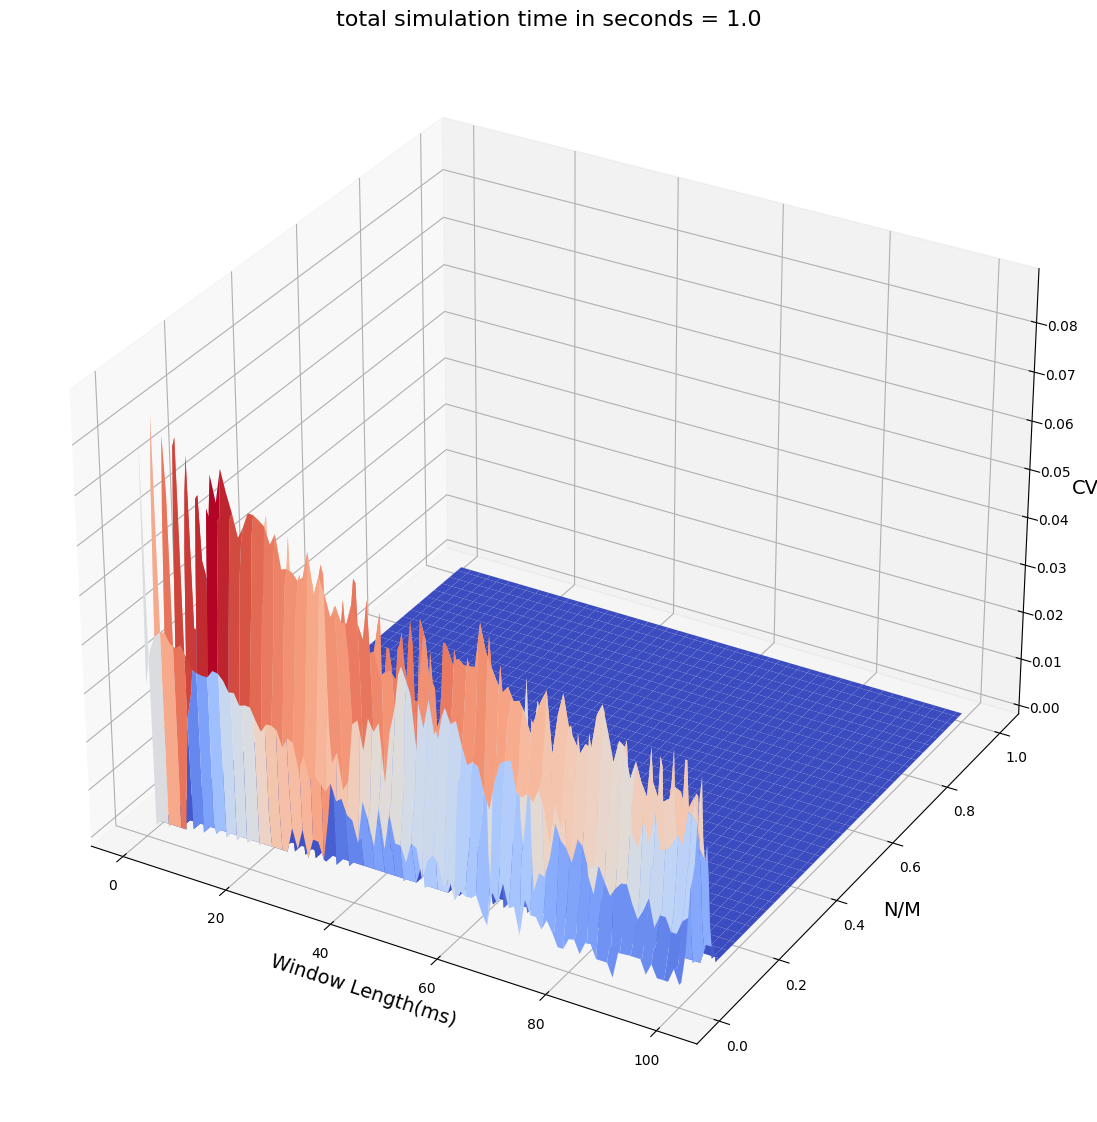

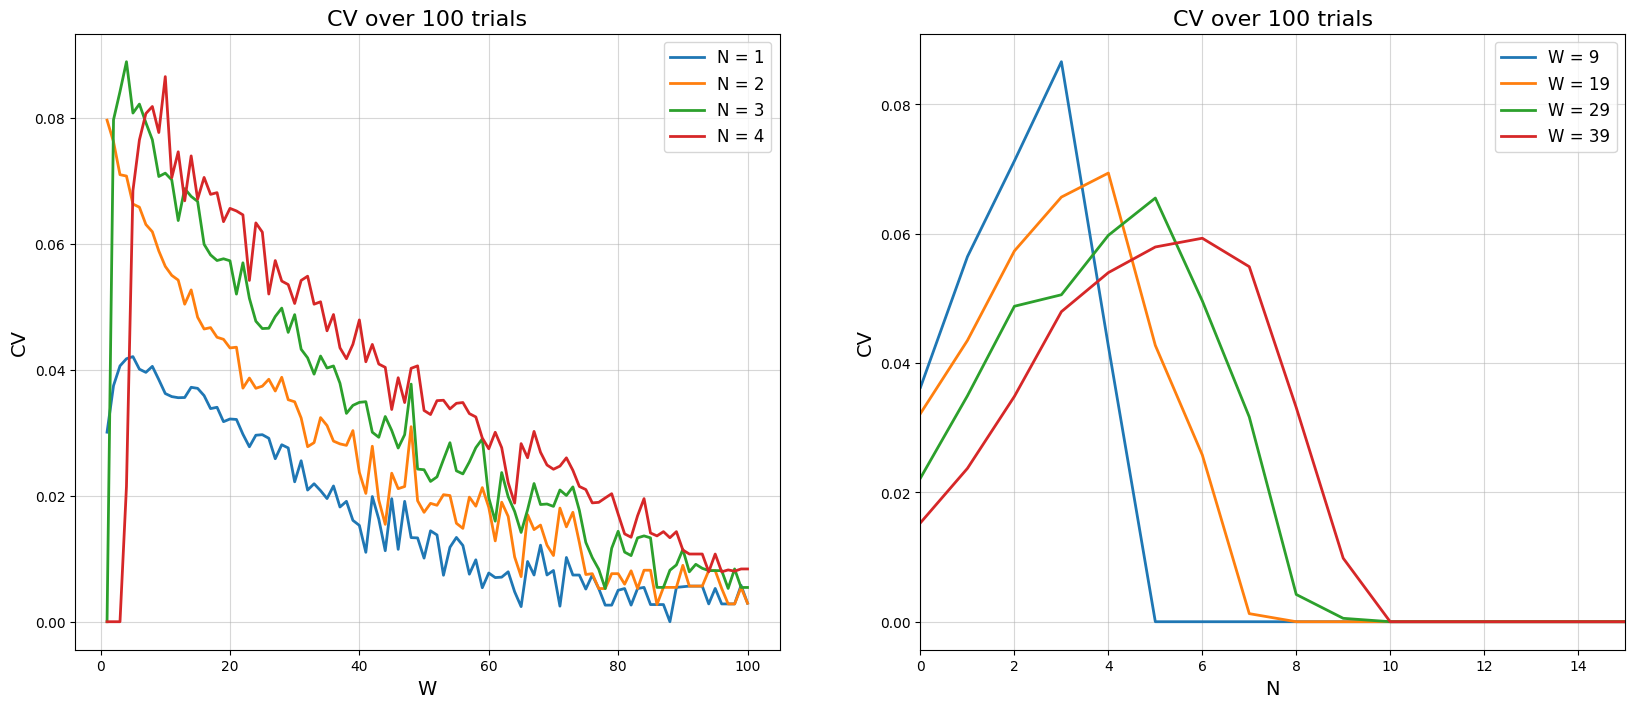

In [35]:
fig = plt.figure(figsize=(14,14))
X, Y = np.meshgrid(W, N)
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y/(len(N)-1), CV.T, cmap='coolwarm')
ax.set_xlabel('Window Length(ms)', fontsize=14)
ax.set_ylabel('N/M', fontsize=14)
ax.set_zlabel('CV', fontsize=14)
ax.set_title("total simulation time in seconds = " + str(duration/1000), fontsize=16)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
selected = []
for i in range(4):
    axs[0].plot(W, CV[:,i], label=f"N = {i+1}", linewidth=2)
    axs[0].set_xlabel('W', fontsize=14)
    axs[0].set_ylabel('CV', fontsize=14)
    axs[0].set_title('CV over 100 trials', fontsize=16)
    axs[0].legend(fontsize=12)
    axs[0].grid(True, which='both', alpha=0.5)
    selected.append(i+1)

selected2 = []
for i in range(9, 41, 10):
    axs[1].plot(N, CV[i,:], label=f"W = {i}", linewidth=2)
    axs[1].set_xlabel('N', fontsize=14)
    axs[1].set_ylabel('CV', fontsize=14)
    axs[1].set_title('CV over 100 trials', fontsize=16)
    axs[1].legend(fontsize=12)
    axs[1].set_xlim(0,15)
    axs[1].grid(True, which='both', alpha=0.5)
    selected2.append(i)

plt.show()

The results are the same as the previous part. By increasing the w, CV will decrease and by
increasing Nnet, at first there is a rise then a fall.

---
---
# **Advanced Neuroscience**
---
---

**This is a graduate-level course in neuroscience that explores advanced topics in the field. The course is designed for students who have already completed a basic course in neuroscience and are interested in diving deeper into the subject matter. The course covers a range of topics related to neural coding, perception, and behavior.**
---

# Course Topics
---




## **Week 1 and 2 : Neural Code**

During the first week of the course, we will explore the process by which information is represented and transmitted by neurons in the brain, known as neural coding. We will focus on how the presence of noise in neural circuits affects the encoding and processing of information, and how cortical circuits organize themselves to minimize the impact of noise.

### Readings:
 * Noise, neural codes and cortical organization by Michael N Shadlen and William T Newsome

 * Is there a signal in the noise? by Michael N Shadlen and William T Newsome

 * The Highly Irregular Firing of Cortical Cells Is Inconsistent with Temporal Integration of Random EPSPs

 * Simple codes versus efficient codes by William R Softky

 * Temporal Complexity and Heterogeneity of Single-Neuron Activity in Premotor and Motor Cortex by Mark M.Churchland and Krishna V. Shenoy

* Neural population dynamics during reaching by Mark M. Churchland  John P. Cunningham by Mark M. Churchland, John P. Cunningham

* Structure in neural population recordings: an expected byproduct of simpler phenomena? by Gamaleldin F Elsayed & John P Cunningham

* Dimensionality reduction for large-scale neural recordings by John P Cunningham & Byron M Yu

---

## **Week 3: Noise Correlation**

During the third week of the course, we will examine the phenomenon of noise correlation in neural circuits, where the activity of two or more neurons is correlated due to shared inputs or connectivity. We will explore the implications of noise correlation for neural coding and information processing, and discuss methods for measuring and manipulating noise correlation.

### Readings:
* Stimulus onset quenches neural variability: a widespread cortical phenomenon by Mark M Churchland and Byron M Yu

* Neural correlations, population coding and computation : Bruno B. Averbeck*, Peter E. Latham

---

## **Week 4: Causal Manipulation**

During the fourth week of the course, we will explore methods for manipulating neural activity to establish causal relationships between brain activity and behavior. We will discuss the strengths and limitations of different methods, such as optogenetics and pharmacology, and examine the ethical implications of manipulating brain activity.

### Readings:
* Millisecond-timescale, genetically targeted optical control of neural activity 

* Transcranial Magnetic Stimulation: A Primer by Mark Hallett 

* A history of optogenetics: the development of tools for controlling brain circuits with light Edward S. Boyden

---

## **Week 5: Travelling Wave**

During the fifth week of the course, we will examine the concept of travelling waves in the brain, where patterns of neural activity propagate across the cortex. We will explore the functional significance of travelling waves and their relationship to perception and behavior.

### Readings:

* Propagating waves mediate information transfer
in the motor cortex by Doug Rubino, Kay A Robbins & Nicholas G Hatsopoulos

* The stimulus-evoked population response in visual
cortex of awake monkey is a propagating wave
Lyle Muller, Alexandre Reynaud

* Cortical travelling waves: mechanisms 
and computational principles by Lyle Muller, Frédéric Chavane

* Theta and alpha oscillations are traveling waves in the human neocortex by Honghui Zhang, Andrew J. Watrous

---

## **Week 6: Motivation and Reward**

During the sixth week of the course, we will explore the neural mechanisms underlying motivation and reward, and how they influence behavior. We will discuss the roles of dopamine and other neuromodulators in reward processing, and examine the neural circuits that mediate motivated behavior.

### Readings:

* Motivation concepts in behavioral neuroscience by Kent C. Berridge

* Uncertainty and Learning by Peter Dayan Angela J Yu
---

### **Week 7: Reinforcement Learning**

During the seventh week of the course, we will examine the concept of reinforcement learning and its neural basis. We will explore how reinforcement learning is used to model behavior and how it is related to reward processing and motivation.

### Readings:

* Reward, Motivation, Review and Reinforcement Learning by Peter Dayan and Bernard W. Balleine

* Reinforcement learning: The Good, The Bad and The Ugly by Peter Dayana and Yael Niv

---

## **Week 8: Evidence Accumulation**

During the eighth week of the course, we will explore the process by which the brain accumulates evidence over time to make decisions. We will discuss the neural circuits involved in evidence accumulation and how they are related to perception and attention.

### Readings:

* Decision Making as a Window on Cognition by Michael N. Shadlen and Roozbeh Kiani

* Representation of Confidence Associated with a Decision 
by Neurons in the Parietal Cortex by Roozbeh Kiani and Michael N. Shadlen

* Motion perception: Seeing and deciding by MICHAEL N. SHADLEN AND WILLIAM T. NEWSOMEt

* Probabilistic reasoning by neurons by Tianming Yang1 & Michael N. Shadlen1



---

## **Week 9: Visual Search**

During the ninth week of the course, we will examine the neural mechanisms underlying visual search, where the brain selectively attends to one or more objects in a complex visual scene. We will discuss how attention is directed in the brain and how it is related to perception and decision-making.

### Readings:

* COMPUTATIONAL MODELLING OF VISUAL ATTENTION by Laurent Itti and Christof Koch

* Attentional Selection and the Representation of Stimulus Dimensions by Sabine Kastner and Earl K. Miller

* Visual Search by Jeremy M Wolfe 

* Five factors that guide attention in visual search by Jeremy M. Wolfe1 and Todd S. Horowitz

---

## **Week 10: Visual Processing**

During the final week of the course, we will explore the neural mechanisms underlying visual processing, including how the brain encodes visual features and how it combines them to form a coherent percept. We will discuss how these mechanisms are related to perception and how they are influenced by attention and other cognitive processes.

### Readings:

* Matching Categorical Object Representations
in Inferior Temporal Cortex of Man and Monkey by Nikolaus Kriegeskorte, Marieke Mur 

* Sparse coding of sensory inputs by Bruno A Olshausen and David J Field


---

# Assignments
**Throughout the course, you will be required to read and critically evaluate the assigned papers, as well as complete written assignments and participate in class discussions. Assignments will be graded based on their quality and thoroughness, as well as your participation in class discussions.**